<a href="https://colab.research.google.com/github/ptk18/Machine-Learning/blob/main/65011466_ML_Lab2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class MLP():
  def __init__(self, network_size=(2,2,1), activation_fn='sigmoid'):
    self.size_input, self.size_hidden, self.size_output = network_size
    self.activation_fn = activation_fn
    self.w_input_hidden = np.random.randn(self.size_input, self.size_hidden)
    self.w_hidden_output = np.random.randn(self.size_hidden, self.size_output)
    self.b_hidden = np.zeros((1, self.size_hidden))
    self.b_output = np.zeros((1, self.size_output))

  def activation(self,z):
    if self.activation_fn == 'sigmoid':
      a = 1/ (1+np.exp(-z))
    return a

  def derivative_activation(self,z):
    if self.activation_fn == 'sigmoid':
      d = z * (1-z)
    return d

  def feedforward(self, X):
    self.hidden_sum = np.dot(X,self.w_input_hidden) + self.b_hidden
    self.hidden_output = self.activation(self.hidden_sum)
    self.output_sum = np.dot(self.hidden_output, self.w_hidden_output)
    self.predicted_output = self.activation(self.output_sum)
    return self.predicted_output

  def backward(self, X, y, learning_rate):
      # computation for the output layer
      output_error = y - self.predicted_output
      output_delta = output_error * self.derivative_activation(self.predicted_output)
      # computation for the hidden layer
      hidden_error = np.dot(output_delta, self.w_hidden_output.T)
      hidden_delta = hidden_error * self.activation(self.hidden_output)
      # update weights and biases
      self.w_hidden_output += learning_rate * np.dot(self.hidden_output.T, output_delta)
      self.b_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
      self.w_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
      self.b_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

  def train(self, X, y, epochs, learning_rate):
      self.loss = []
      self.epoch = []
      for e in range(epochs):
          output = self.feedforward(X)
          self.backward(X, y, learning_rate)
          if e % 2000 == 0:
              l = 0.5 * np.mean(np.square(y - output))
              self.loss.append(l)
              self.epoch.append(e)
              print("Epoch ", e, ", Loss:", l)
      return self.loss, self.epoch



In [ ]:
X = np.array([[0,0], [0,1],[1,0],[1,1]])
y = np.array([[0], [1], [1], [0]])
print(X)
print(y)
mlp = MLP(network_size=(2,4,1), activation_fn='sigmoid')
mlp.train(X, y, epochs=20000, learning_rate=0.2)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]
Epoch  0 , Loss: 0.1389649598894964
Epoch  2000 , Loss: 0.12427086176067234
Epoch  4000 , Loss: 0.124853214749097
Epoch  6000 , Loss: 0.12509291927241722
Epoch  8000 , Loss: 0.12486818578962103
Epoch  10000 , Loss: 0.1250542768616589
Epoch  12000 , Loss: 0.1249445438283571
Epoch  14000 , Loss: 0.12497487133706653
Epoch  16000 , Loss: 0.12502478557653204
Epoch  18000 , Loss: 0.1249844395274689


([0.1389649598894964,
  0.12427086176067234,
  0.124853214749097,
  0.12509291927241722,
  0.12486818578962103,
  0.1250542768616589,
  0.1249445438283571,
  0.12497487133706653,
  0.12502478557653204,
  0.1249844395274689],
 [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])

In [ ]:
output = mlp.feedforward(X)
print(output)

[[0.49769641]
 [0.49513121]
 [0.49705493]
 [0.49420996]]


In [ ]:

import pandas as pd
import numpy as np
filename = 'iris.csv'
df = pd.read_csv(filename)
# Create feature set : X by drop label column in dataframe
X=df.drop('variety', axis=1)
X = X.values
# Label the output classes
# Since Setosa and Versicolor are linearly separable and between Setosa and Virginica too,
# We will do the binary classification between Setosa (0) and group of Versicolor + Virginica (1
y=df['variety']
y = y.values.reshape(150, 1)
l_y = []
for i in range(len(y)):
  if y[i, 0] == 'Setosa':
    l_y.append([1, 0, 0])
  elif y[i, 0] == 'Versicolor':
    l_y.append([0, 1, 0])
  elif y[i, 0] == 'Virginica':
    l_y.append([0, 0, 1])
y = np.array(l_y)
print(X)
print(y)
print(X.shape)
print(y.shape)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
mlp = MLP(network_size=(4,10,3), activation_fn='sigmoid')
loss, epoch = mlp.train(X, y, epochs=100000, learning_rate=0.001)

Epoch  0 , Loss: 0.1810687245765229
Epoch  2000 , Loss: 0.021540108768171987
Epoch  4000 , Loss: 0.013668096352802347
Epoch  6000 , Loss: 0.00846141382355254
Epoch  8000 , Loss: 0.007447141717132234
Epoch  10000 , Loss: 0.006901525194760246
Epoch  12000 , Loss: 0.008951980167708961
Epoch  14000 , Loss: 0.01205445246833341
Epoch  16000 , Loss: 0.009064383560774828
Epoch  18000 , Loss: 0.01150545504139983
Epoch  20000 , Loss: 0.08278076542329675


<ipython-input-19-c53d0f5d5c48>:12: RuntimeWarning: overflow encountered in exp
  a = 1/ (1+np.exp(-z))


Epoch  22000 , Loss: 0.0663056900064565
Epoch  24000 , Loss: 0.06733213987641289
Epoch  26000 , Loss: 0.0641131794091431
Epoch  28000 , Loss: 0.06152703990743591
Epoch  30000 , Loss: 0.06309844990007513
Epoch  32000 , Loss: 0.052957813676571375
Epoch  34000 , Loss: 0.07305814401241115
Epoch  36000 , Loss: 0.06823283023933448
Epoch  38000 , Loss: 0.06749294530736001
Epoch  40000 , Loss: 0.09330282221265586
Epoch  42000 , Loss: 0.07247629376063636
Epoch  44000 , Loss: 0.06762523552708054
Epoch  46000 , Loss: 0.056056957463394716
Epoch  48000 , Loss: 0.05562075701404252
Epoch  50000 , Loss: 0.024108665623397536
Epoch  52000 , Loss: 0.00982999416345253
Epoch  54000 , Loss: 0.009208848571951738
Epoch  56000 , Loss: 0.019058784984299863
Epoch  58000 , Loss: 0.05709750207646479
Epoch  60000 , Loss: 0.05805093711743669
Epoch  62000 , Loss: 0.05547967327338777
Epoch  64000 , Loss: 0.06378127155373166
Epoch  66000 , Loss: 0.05113022721416901
Epoch  68000 , Loss: 0.05557939433247904
Epoch  70000 

In [ ]:
output=mlp.feedforward(X)
print(output)

[[9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.99545422e-01 3.40156353e-03 1.03821526e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.98838359e-01 9.50738293e-03 7.89129648e-04]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.98850389e-01 9.39991415e-03 7.91536402e-04]
 [9.99568142e-01 3.21533726e-03 1.05389047e-03]
 [9.99568115e-01 3.21556315e-03 1.05387077e-03]
 [9.98841389e-01 9.48030634e-03 7.89732789e-04]
 [9.99530710e-01 3.52262057e-03 1.02859531e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.98847621e-01 9.42463443e-03 7.90979738e-04]
 [9.99568118e-01 3.21553633e-03 1.05387311e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.99568147e-01 3.21529494e-03 1.05389416e-03]
 [9.99419140e-01 4.45165914e-03 9.66426519e-04]
 [9.99568147e-01 3.21529493e-03 1.05389416e-03]
 [9.98837754e-01 9.51279437e-03 7.890093

<ipython-input-19-c53d0f5d5c48>:12: RuntimeWarning: overflow encountered in exp
  a = 1/ (1+np.exp(-z))


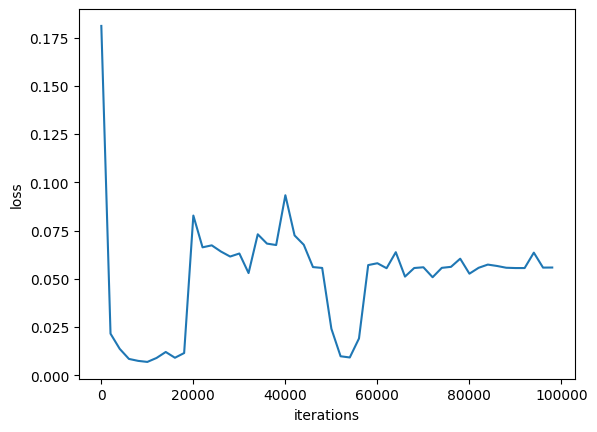

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [ ]:
import numpy as np

class HebbianNetwork:
  def __init__(self, input_size, output_size, learning_rate=0.01):
    self.weights = np.random.rand(input_size, output_size)
    self.learning_rate = learning_rate

  def train(self, inputs, outputs):
    for i in range(len(inputs)):
      input_vector = inputs[i]
      output_vector = outputs[i]
      self.weights += self.learning_rate * np.outer(input_vector, output_vector)

  def predict(self, input_vector):
    return np.dot(input_vector, self.weights)


inputs = np.array([[1,0], [0,1], [1,1], [0,0]])
outputs = np.array([[1,0], [0,1], [1,1], [0,0]])

network = HebbianNetwork(input_size=2, output_size=2)
network.train(inputs, outputs)

test_input = np.array([1,0])
predicted_output = network.predict(test_input)

print(f"Predicted output for input {test_input}: {predicted_output}")

Predicted output for input [1 0]: [0.954242   0.80156035]
